In [1]:
%matplotlib inline

In [2]:
from pylab import *
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120

In [3]:
data = loadtxt('subhalo_411321_parameters.dat')
snapshot       = data[:,0]
t              = data[:,1]
M_disk         = data[:,2]
X_center_stars = data[:,3:6]
phi_inertia    = data[:,6]
theta_inertia  = data[:,7]
phi_L          = data[:,8]
theta_L        = data[:,9]
a_mn           = data[:,10]
b_mn           = data[:,11]
M_halo         = data[:,12]
X_center_halo  = data[:,13:16]
b_halo         = data[:,16]

Halo is on average x52 more massive and x53 larger than the disk


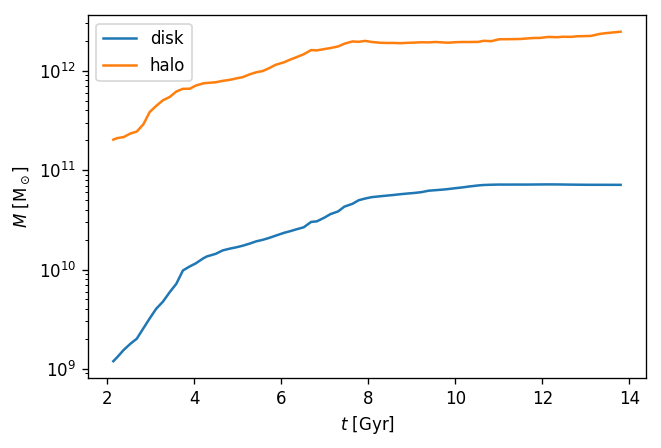

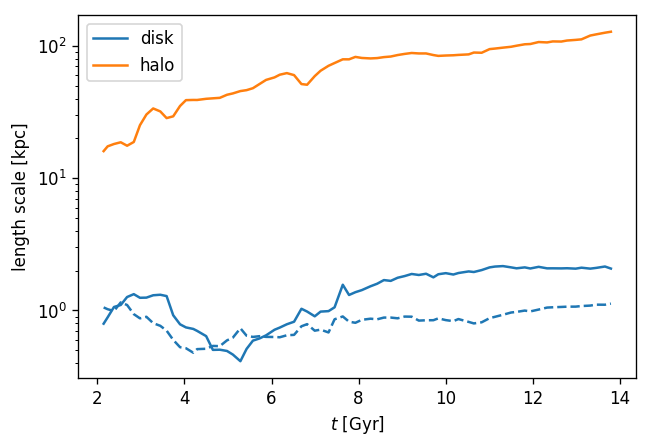

In [4]:
semilogy(t, M_disk)
semilogy(t, M_halo)
xlabel('$t$ [Gyr]')
ylabel('$M\ [\mathrm{M}_\odot]$')
legend(('disk', 'halo'))

figure()
semilogy(t, a_mn, c='C0', label='disk')
semilogy(t, b_mn, c='C0', ls='--')
semilogy(t, b_halo, c='C1', label='halo')
xlabel('$t$ [Gyr]')
ylabel('length scale [kpc]')
legend()

print(f'Halo is on average x{mean(M_halo/M_disk):.0f} more massive and x{mean(b_halo/a_mn):.0f} larger than the disk')

Maximum distance between stellar and halo centres is 0.76 kpc


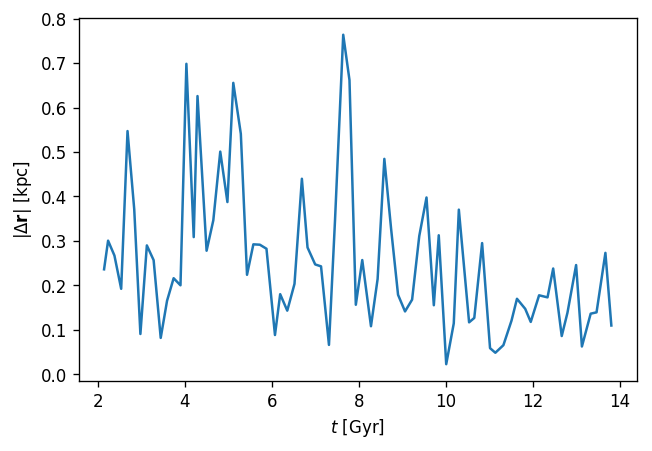

In [5]:
distance = linalg.norm(X_center_stars - X_center_halo, axis=1)
plot(t, distance)
xlabel('$t$ [Gyr]')
ylabel(r'$|\Delta \mathbf{r}|$ [kpc]')
print(f'Maximum distance between stellar and halo centres is {distance.max():.2f} kpc')

Text(0, 0.5, '$b/a$')

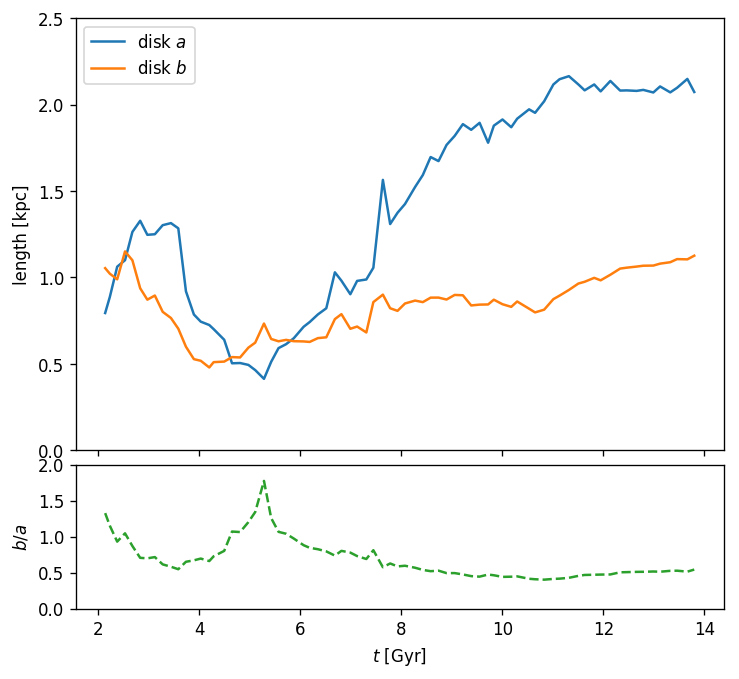

In [6]:
axes([0.05,0.33,0.9,0.9])
plot(t, a_mn)
plot(t, b_mn)
legend(('disk $a$', 'disk $b$'))
ylabel('length [kpc]')
ylim(0, 2.5)
gca().set_xticklabels([])
axes([0.05,0.0,0.9,0.3])
plot(t, b_mn/a_mn, '--', c='C2')
ylim(0,2)
xlabel('$t$ [Gyr]')
ylabel('$b/a$')

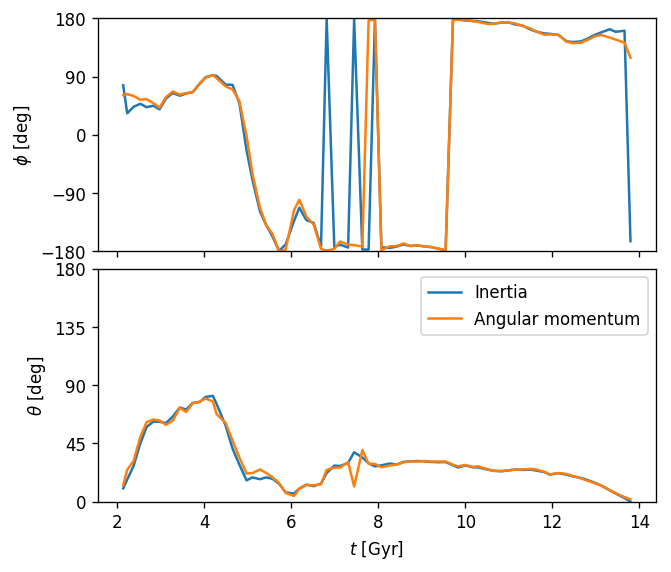

In [7]:
figsize = rcParams['figure.figsize']
figure(figsize=[figsize[0], figsize[1]*4/3])
subplot(211)
plot(t, rad2deg(phi_inertia))
plot(t, rad2deg(phi_L))
ylabel(r'$\phi$ [deg]')
ylim(-180,180)
gca().set_xticklabels([])
gca().yaxis.set_ticks([-180,-90,0,90,180])
subplot(212)
plot(t, rad2deg(theta_inertia))
plot(t, rad2deg(theta_L))
xlabel(r'$t$ [Gyr]')
ylabel(r'$\theta$ [deg]')
gca().yaxis.set_ticks([0,45,90,135,180])
ylim(0,180)
legend(('Inertia', 'Angular momentum'))
subplots_adjust(hspace=0.075)

Text(0, 0.5, '$\\mathbf{r}_\\mathrm{corrected}$ [kpc]')

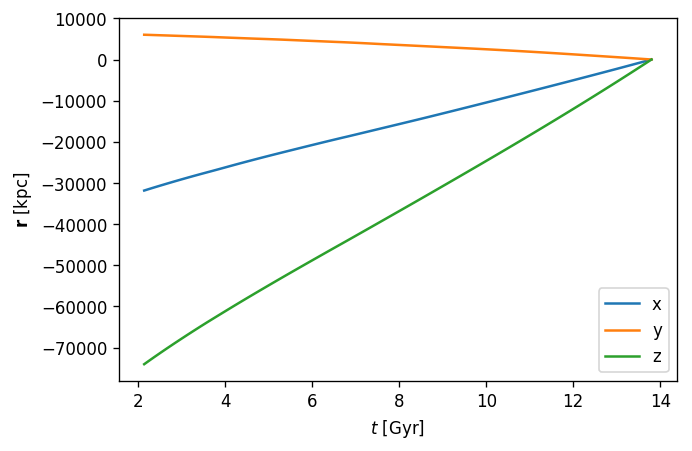

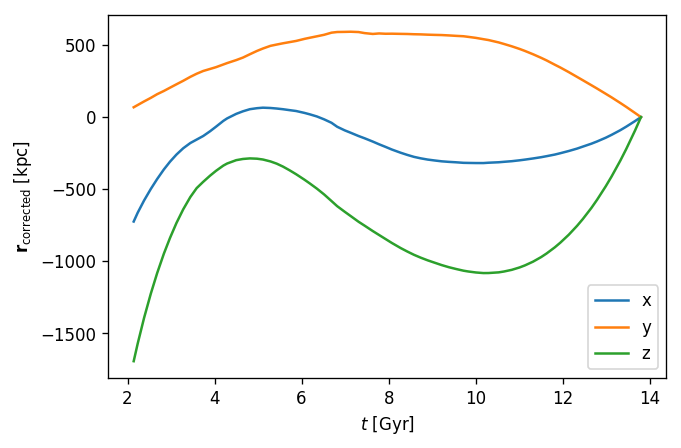

In [8]:
# Average velocity throughout cosmic time
plot(t, X_center_stars)
xlabel('$t$ [Gyr]')
ylabel('$\mathbf{r}$ [kpc]')
Vx, _ = polyfit(t, X_center_stars[:,0], 1)
Vy, _ = polyfit(t, X_center_stars[:,1], 1)
Vz, _ = polyfit(t, X_center_stars[:,2], 1)
V = array([Vx, Vy, Vz])
legend(('x', 'y', 'z'))

figure()
plot(t, X_center_stars-V*(t-t[-1])[:,None])
legend(('x', 'y', 'z'))
xlabel('$t$ [Gyr]')
ylabel('$\mathbf{r}_\mathrm{corrected}$ [kpc]')